In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
    # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect,func

In [39]:
    # create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [36]:
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [40]:
    # reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(engine,reflect = True)

In [41]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [42]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
    # Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [ ]:
    # Find the most recent date in the data set.
# inspector = inspect(engine)
# columns = inspector.get_columns('Measurement')
# for c in columns:
# print(c['name'], c['type'])

In [22]:
    # Find the most recent date in the data set.
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')


In [23]:
# Find the most recent date in the data set.
last =session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last

('2017-08-23')

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
date_last_12months= dt.date(2017,8,23) - dt.timedelta(days=365)
date_last_12months

datetime.date(2016, 8, 23)

In [14]:
#find the eralist measurment date
session.query(Measurement.date).order_by(Measurement.date).all()

[('2010-01-01'),
 ('2010-01-01'),
 ('2010-01-01'),
 ('2010-01-01'),
 ('2010-01-01'),
 ('2010-01-01'),
 ('2010-01-01'),
 ('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-03'),
 ('2010-01-03'),
 ('2010-01-03'),
 ('2010-01-03'),
 ('2010-01-03'),
 ('2010-01-03'),
 ('2010-01-03'),
 ('2010-01-04'),
 ('2010-01-04'),
 ('2010-01-04'),
 ('2010-01-04'),
 ('2010-01-04'),
 ('2010-01-04'),
 ('2010-01-04'),
 ('2010-01-05'),
 ('2010-01-05'),
 ('2010-01-05'),
 ('2010-01-05'),
 ('2010-01-05'),
 ('2010-01-05'),
 ('2010-01-06'),
 ('2010-01-06'),
 ('2010-01-06'),
 ('2010-01-06'),
 ('2010-01-06'),
 ('2010-01-06'),
 ('2010-01-07'),
 ('2010-01-07'),
 ('2010-01-07'),
 ('2010-01-07'),
 ('2010-01-07'),
 ('2010-01-07'),
 ('2010-01-07'),
 ('2010-01-08'),
 ('2010-01-08'),
 ('2010-01-08'),
 ('2010-01-08'),
 ('2010-01-08'),
 ('2010-01-08'),
 ('2010-01-08'),
 ('2010-01-09'),
 ('2010-01-09'),
 ('2010-01-09'),
 ('2010-01-09'),
 ('2010-01-09'

In [24]:

# Starting from the most recent data point in the database. 
date_start = session.query(Measurement.date).order_by(Measurement.date).first().date
date_start


'2010-01-01'

In [25]:
# Calculate the date one year from the last date in data set.

last_date_year = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
last_date_year


'2017-08-23'

In [26]:
# Perform a query to retrieve the data and precipitation scores

precipitation_result =session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >= date_last_12months).\
  order_by(Measurement.date).all()
precipitation_result



[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [18]:

# Save the query results as a Pandas DataFrame. Explicitly set the column names
query_df = pd.DataFrame(precipitation_result)
query_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [19]:

# Sort the dataframe by date
sort_df = query_df.sort_values('date')
sort_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2228,2017-08-23,0.08
2226,2017-08-23,0.00
2227,2017-08-23,0.00


Text(0, 0.5, 'Precipitation Data')

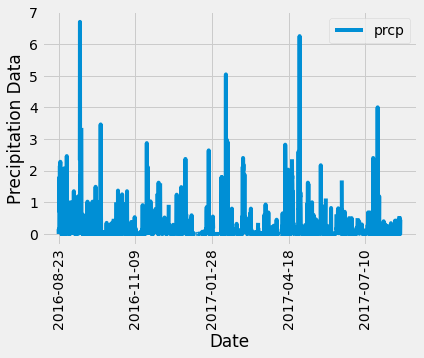

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
sort_df.plot(x = "date", y = "prcp",rot =90)
plt.xlabel("Date")
plt.ylabel("Precipitation Data")

In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_sta = sort_df.describe()
summary_sta

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number of stations in the dataset
total_station =session.query(func.count(Station.name )).all()
total_station

[(9)]

In [23]:
#Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).\
 order_by(func.count(Measurement.station).desc()).all()
active_station


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
star_end_temp = session.query(Measurement.station, func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station >= date_start ).filter(Measurement.date <= last_year).all()
star_end_temp 

In [35]:
star_end_temp = session.query(Measurement.station, func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station >= date_start ).filter(Measurement.date <= last_date_year).all()
star_end_temp 

[('USC00519397', 53.0, 87.0, 73.09795396419437)]

In [34]:
star_end_temp = session.query(Measurement.station, func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station >= date_start ).filter(Measurement.date <= date_start).all()
star_end_temp 

[('USC00519523', 65.0, 75.0, 69.71428571428571)]

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [24]:
#Using the most active station id from the previous query, calculate the lowest, highest, and average temperature. [(54.0, 85.0, 71.66378066378067)]

avrg_temp = session.query(Measurement.station, func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

avrg_temp



[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
result_station = session.query( Measurement.tobs).\
    filter(Measurement.station =='USC00519281').\
    filter(Measurement.date >= date_last_12months).all()
result_station

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
result_station = session.query( Measurement.tobs).\
    filter(Measurement.station =='USC00519281').\
    filter(Measurement.date >= date_last_12months).all()
result_station

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [27]:
tobs_df = pd.DataFrame(result_station,columns=['tobs'])
tobs_df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


<function matplotlib.pyplot.show(*args, **kw)>

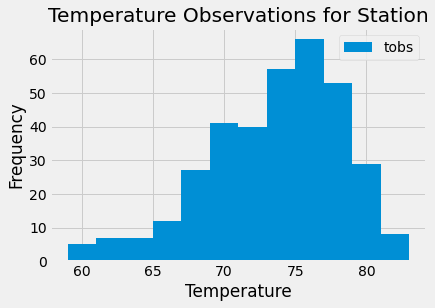

In [28]:
# plot the results as a histogram
tobs_df.plot.hist(bins =12)
plt.title("Temperature Observations for Station")
plt.xlabel("Temperature")

plt.show

# Close Session

In [192]:
# Close Session
session.close()